# Hack the gap!

## Exploring UK gender pay gap data with Data + Women, London

Tutorial by Christine Dixon April 2019

## Using jupyter:

<font color='green'>Green cell border <font color='black'>means the cell is in 'edit' mode
<br> You can type code in a green cell, then hit <b> shift + enter </b>to execute the code  
<br> To get documentation on a function: hold shift and double-click tab


<br>hit 'esc' to go into 'command' mode <font color='blue'>(blue cell border)<font color='black'>
<br>In command mode: 'a' makes a new cell above; 'b' makes a new cell below

<br>hit 'enter' or click into the cell to return to 'edit' mode

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import the data

    df = pd.read_csv('file_name.csv')

Check your dataframe using one of these functions:

    df.head()
    df.tail(2)
    df.sample()
    
    df.sample().T

In [177]:
df = pd.read_csv('UK Gender Pay Gap Data - 2017 to 2018.csv')
df.sample().T

,4653
EmployerName,Irwin Mitchell LLP
Address,"Riverside East,\r\n2 Millsands,\r\nSheffield,\..."
CompanyNumber,OC343897
SicCodes,NaN
DiffMeanHourlyPercent,12.8
DiffMedianHourlyPercent,15.9
DiffMeanBonusPercent,18
DiffMedianBonusPercent,20
MaleBonusPercent,28.6
FemaleBonusPercent,24.5


In [4]:
new_df = pd.read_csv('UK Gender Pay Gap Data - 2018 to 2019.csv')

In [5]:
## If you know exactly which cell(s) you need:
# df.iloc[rownumber, colnumber]
# df.loc[rowname, colname]



## Sort the data to find the top and bottom

    df.sort_values()

In [6]:
df = df.sort_values('DiffMedianHourlyPercent')

## Use square brackets to select a column

In [7]:
df.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

In [8]:
# get any column you like!
df['EmployerSize']

838         250 to 499
4484        250 to 499
7288      1000 to 4999
7004        500 to 999
6549      1000 to 4999
2332      1000 to 4999
10038       250 to 499
2738        250 to 499
10467       250 to 499
10468     Not Provided
5089     Less than 250
9745        250 to 499
7124      1000 to 4999
9653        250 to 499
7197     Less than 250
2036        500 to 999
4035        250 to 499
5365      1000 to 4999
202       1000 to 4999
7029        250 to 499
8117      1000 to 4999
853         250 to 499
6215      1000 to 4999
124         250 to 499
9164        500 to 999
957         250 to 499
192         500 to 999
6554        250 to 499
8876        250 to 499
9070      1000 to 4999
             ...      
958      Less than 250
7825        250 to 499
3823        250 to 499
4269        500 to 999
8748     Less than 250
9216        250 to 499
8632        250 to 499
5999        250 to 499
608         500 to 999
2265        500 to 999
4013        250 to 499
7958        250 to 499
2076       

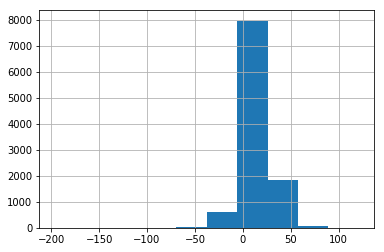

In [9]:
# Make a graph of that column
df['DiffMedianHourlyPercent'].hist()

(-75, 75)

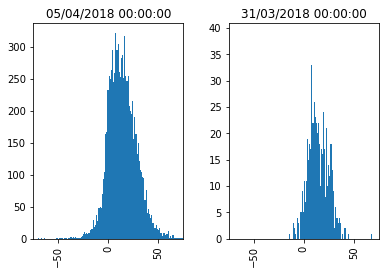

In [10]:
# Use another column to group the data

df['DiffMeanHourlyPercent'].hist(bins=500, by=df['DueDate'], sharex=True)
plt.xlim(-75, 75)

In [11]:
# Is there a difference?

df['DiffMeanHourlyPercent'].groupby(df['DueDate']).agg(['mean','std', 'median'])

,mean,std,median
DueDate,,,
05/04/2018 00:00:00,14.224178,15.641415,13.1
31/03/2018 00:00:00,14.915449,10.634640,14.0


In [12]:
# How to filter

df[df['DiffMedianHourlyPercent'] < 0]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
838,BAR 2010 LIMITED,"Mitre House,\r\nNorth Park Road,\r\nHarrogate,...",04172269,70229,-148.0,-196.5,0.0,0.0,0.0,0.0,...,0.0,99.5,0.5,NaN,Jason Hargreaves (Director),250 to 499,BAR 2010 LIMITED,True,05/04/2018 00:00:00,20/04/2018 13:08:53
4484,INBRELLA LIMITED,"5th, Floor Hampton By Hilton,\r\n42-50 Kimpton...",08274708,69201,-150.0,-164.0,0.0,0.0,0.0,0.0,...,25.9,96.1,3.9,NaN,David Smith (Finance Director),250 to 499,INBRELLA LIMITED,True,05/04/2018 00:00:00,17/09/2018 10:21:11
7288,RANDSTAD HR SOLUTIONS LIMITED,"450, Capability Green,\r\nLuton,\r\nBedfordshi...",02904400,78200,-21.3,-103.6,31.6,-2.0,2.9,1.2,...,68.7,31.1,68.9,https://www.randstad.co.uk/about-us/about-rand...,Graham Trevor (HR Director),1000 to 4999,RANDSTAD HR SOLUTIONS LIMITED,False,05/04/2018 00:00:00,03/04/2018 19:51:29
7004,PLUS PAYROLL SERVICES LIMITED,"5th, Floor Hampton By Hilton,\r\n42-50 Kimpton...",08811568,78109,-64.4,-100.1,0.0,0.0,0.0,0.0,...,9.9,30.9,69.1,NaN,David Smith (Finance Director),500 to 999,PLUS PAYROLL SERVICES LIMITED,False,05/04/2018 00:00:00,04/04/2018 16:21:42
6549,NWN MEDIA LIMITED,"Loudwater Mill,\r\nStation Road,\r\nHigh Wycom...",00167825,18110,-13.2,-85.2,35.0,10.0,2.2,2.2,...,39.2,68.5,31.5,NaN,Tracey Olaleye (Group HR Director),1000 to 4999,NWN MEDIA LIMITED,True,05/04/2018 00:00:00,25/10/2018 10:31:54
2332,CREST PLUS OPERATIONS LIMITED,"Office Village,\r\nChester Business Park,\r\nC...",04620624,74909,-66.5,-85.2,0.0,0.0,0.0,0.0,...,3.2,81.2,18.8,https://www.crestplus.com/pay-gap-report.pdf,Derek Harling (Managing Director),1000 to 4999,CREST PLUS OPERATIONS LIMITED,False,05/04/2018 00:00:00,19/03/2018 14:01:24
10038,WALLACE TRUST,"Woodnewton - A Learning Community,\r\nRowlett ...",08034402,"1,\r\n85100",-2.2,-81.9,0.0,0.0,0.0,0.0,...,90.5,6.0,94.0,http://www.woodnewtontrust.com/,NaN,250 to 499,WALLACE TRUST,True,31/03/2018 00:00:00,05/04/2018 15:17:33
2738,Ducas Ltd,"The Meeting House,\r\nLittle Mount Sion,\r\nTu...",06126794,82990,-37.2,-81.3,0.0,0.0,0.0,0.0,...,73.2,26.8,73.2,NaN,Simon Bailey (Director),250 to 499,Ducas Ltd,False,05/04/2018 00:00:00,12/03/2018 17:58:27
10467,YELLOW DOT GROUP LIMITED,"91 Lakewood Road,\r\nChandler's Ford,\r\nEastl...",05463277,"70100,\r\n74990",-35.4,-80.6,-114.3,-622.3,53.1,69.6,...,100.0,2.6,97.4,http://www.yellowdotnursery.co.uk/pdf/2017%20G...,Jessica Hilton (Group Financial Controller),250 to 499,BLUE DOT PROPERTY LIMITED,False,05/04/2018 00:00:00,18/01/2018 09:54:12
10468,YELLOW DOT LIMITED,"91 , Lakewood Road,\r\nChandler's Ford,\r\nEas...",04985737,85100,-35.4,-80.6,-114.3,-622.3,53.1,69.6,...,100.0,2.6,97.4,http://www.yellowdotnursery.co.uk/pdf/2017%20G...,Jessica Hilton (Group Financial Controller),Not Provided,YELLOW DOT LIMITED,False,05/04/2018 00:00:00,18/10/2017 13:22:55


In [28]:
df[df['EmployerName'].str.contains('Lloyds')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,total%female,Description
5364,Lloyds Banking Group PLC,"The Mound,\r\nEdinburgh,\r\nUnited Kingdom,\r\...",SC095000,70100,32.8,32.8,65.2,53.1,93.8,95.3,...,35.4,http://www.lloydsbankinggroup.com/globalassets...,Jen Tippin (Group People & Productivity Director),"20,000 or more",Lloyds Banking Group PLC,False,05/04/2018 00:00:00,07/03/2018 08:49:54,56.80,Activities of head offices
5363,Lloyds Bank PLC,"Canons House,\r\nCanons way,\r\nBristol,\r\nBS...",00002065,64191,37.6,42.7,70.4,60.7,91.6,93.2,...,31.5,http://www.lloydsbankinggroup.com/globalassets...,Jen Tippin (Group People & Productivity Director),"20,000 or more",Lloyds Bank PLC,False,05/04/2018 00:00:00,23/02/2018 12:16:47,54.85,Banks


In [29]:
df['CompanyLinkToGPGInfo'][df['EmployerName'].str.contains('Lloyds')]

5364    http://www.lloydsbankinggroup.com/globalassets...
5363    http://www.lloydsbankinggroup.com/globalassets...
Name: CompanyLinkToGPGInfo, dtype: object

## Make a new column from a calculation
Can be useful to list the column names first
    
    df.columns

    df['new_col_name'] = df[col1] + df[col2]

In [13]:
df.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

In [193]:
## Make a new column based on a calculation

df['total%female'] = (df['FemaleLowerQuartile'] + df['FemaleLowerMiddleQuartile'] + df['FemaleUpperMiddleQuartile'] + df['FemaleTopQuartile'])/4


## How does the gap vary by industry?

In [17]:
# More exploration: What type of data do we have?
# SICcodes is object. We need to make it match the other dataframe before we can join them

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10538 entries, 838 to 8034
Data columns (total 26 columns):
EmployerName                 10538 non-null object
Address                      10538 non-null object
CompanyNumber                9185 non-null object
SicCodes                     9973 non-null object
DiffMeanHourlyPercent        10538 non-null float64
DiffMedianHourlyPercent      10538 non-null float64
DiffMeanBonusPercent         10538 non-null float64
DiffMedianBonusPercent       10538 non-null float64
MaleBonusPercent             10538 non-null float64
FemaleBonusPercent           10538 non-null float64
MaleLowerQuartile            10538 non-null float64
FemaleLowerQuartile          10538 non-null float64
MaleLowerMiddleQuartile      10538 non-null float64
FemaleLowerMiddleQuartile    10538 non-null float64
MaleUpperMiddleQuartile      10538 non-null float64
FemaleUpperMiddleQuartile    10538 non-null float64
MaleTopQuartile              10538 non-null float64
FemaleTopQua

In [180]:
df['SicCodes'] = df['SicCodes'].str.extract(r'(\d+)')

In [181]:
len(df[df['SicCodes'].isnull()])

565

In [182]:
df.loc[df['SicCodes'].isnull(), 'SicCodes'] = 0

In [183]:
df['SicCodes'] = df['SicCodes'].astype('int')

In [184]:
sic_df = pd.read_csv('SIC07_CH_condensed_list_en.csv', index_col='SIC Code')
sic_df.sample(3)

,Description
SIC Code,
49410,Freight transport by road
43910,Roofing activities
28302,Manufacture of agricultural and forestry machi...


In [185]:
df = df.join(sic_df, on='SicCodes', how='left')

In [186]:
df.sample(1)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Description
9585,TRIANGLE WHOLEFOODS COLLECTIVE LIMITED,"Unit G15 lacy Way,\r\nLowfields Business Park,...",IP21975R,0,0.0,0.0,6.7,6.2,76.4,75.0,...,64.6,35.4,http://www.suma.coop/about/faq/gender-pay-gap/,Nicola Roebuck (Service Area Coordinator),250 to 499,TRIANGLE WHOLEFOODS COLLECTIVE LIMITED,False,05/04/2018 00:00:00,15/03/2018 08:40:01,NaN


In [208]:
industry_summary = df[['DiffMeanHourlyPercent','total%female']].groupby(df['Description']).agg(['count','mean','sem'])


In [209]:
industry_summary

DiffMeanHourlyPercent  \
                                                                   count   
Description                                                                
Accounting and auditing activities                                    10   
Activities auxiliary to financial intermediatio...                    10   
Activities of amusement parks and theme parks                          7   
Activities of business and employers membership...                     8   
Activities of call centres                                            26   
Activities of collection agencies                                      5   
Activities of construction holding companies                           6   
Activities of distribution holding companies                           3   
Activities of exhibition and fair organisers                           3   
Activities of extraterritorial organizations an...                     2   
Activities of financial services holding companies                    24   
Activities of head offices                                           306   
Activities of households as employers of domest...                     1   
Activities of insurance agents and brokers                            25   
Activities of investment trusts                                        1   
Activities of mortgage finance companies                               2   
Activities of other holding companies n.e.c.                          55   
Activities of other membership organizations n....                    20   
Activities of patent and copyright agents; othe...                     3   
Activities of production holding companies                             5   
Activities of professional membership organizat...                     3   
Activities of racehorse owners                                         1   
Activities of real estate investment trusts                            1   
Activities of religious organizations                                 12   
Activities of sport clubs                                             40   
Activities of trade unions                                             7   
Activities of venture and development capital c...                     2   
Administration of financial markets                                    2   
Advertising agencies                                                  42   
Agents involved in the sale of a variety of goods                      3   
...                                                                  ...   
Wholesale of grain, unmanufactured tobacco, see...                     1   
Wholesale of hardware, plumbing and heating equ...                     3   
Wholesale of household goods (other than musica...                    14   
Wholesale of machine tools                                             2   
Wholesale of meat and meat products                                    5   
Wholesale of metals and metal ores                                    10   
Wholesale of mining, construction and civil eng...                     1   
Wholesale of office furniture                                          2   
Wholesale of other food, including fish, crusta...                     6   
Wholesale of other fuels and related products                          5   
Wholesale of other intermediate products                              12   
Wholesale of other machinery and equipment                            12   
Wholesale of other office machinery and equipment                      4   
Wholesale of perfume and cosmetics                                    14   
Wholesale of petroleum and petroleum products                          6   
Wholesale of pharmaceutical goods                                     24   
Wholesale of radio, television goods & electric...                     9   
Wholesale of sugar and chocolate and sugar conf...                     1   
Wholesale of textiles                                                  7   
Wholesale of tobacco pr

In [211]:
to_plot = industry_summary.loc[industry_summary['DiffMeanHourlyPercent','count'] > 20]
to_plot.head(2)

DiffMeanHourlyPercent  \
                                                                   count   
Description                                                                
Activities of call centres                                            26   
Activities of financial services holding companies                    24   

                                                                         \
                                                         mean       sem   
Description                                                               
Activities of call centres                           7.319231  1.509447   
Activities of financial services holding companies  31.095833  2.006651   

                                                   total%female             \
                                                          count       mean   
Description                                                                  
Activities of call centres                                   26  48.835577   
Activities of financial services holding companies           24  43.539583   

                                                              
                                                         sem  
Description                                                   
Activities of call centres                          1.623914  
Activities of financial services holding companies  3.196040

In [212]:
len(to_plot)

103

## Plotting the data

In [215]:
xdata = to_plot['total%female','mean']
ydata = to_plot['DiffMeanHourlyPercent','mean']

xerr = to_plot['total%female','sem']
yerr = to_plot['DiffMeanHourlyPercent','sem']

<IPython.core.display.Javascript object>


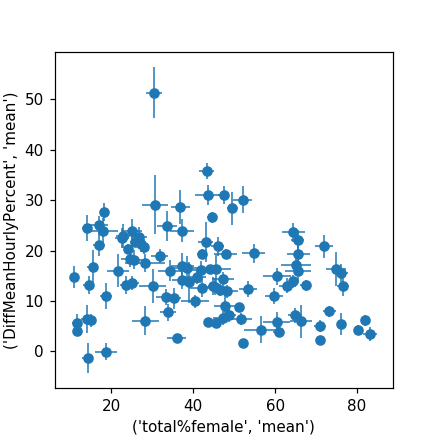

<ErrorbarContainer object of 3 artists>

In [218]:
plt.figure(figsize=(4,4))

sns.scatterplot(x=xdata, y=ydata)

plt.errorbar(x=xdata, y=ydata, 
             xerr=xerr, yerr=yerr, fmt='o',elinewidth=1, alpha=1)



## Make an interactive plot!

In [219]:
# To interact with this plot:

import matplotlib.animation as animation

%matplotlib notebook

<IPython.core.display.Javascript object>


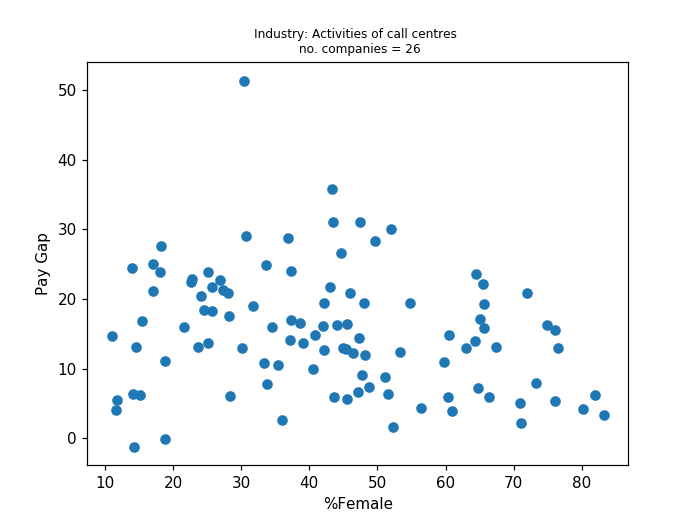

6

In [222]:
plt.figure()
plt.scatter(xdata, ydata, picker=2) #picker no. pixels away from data point
plt.gca().set_xlabel('%Female')
plt.gca().set_ylabel('Pay Gap')

def onpick(event):
    '''Listens for click near data point; finds & displays relevant info'''
    origin = to_plot.index[event.ind[0]]
    n = to_plot.iloc[event.ind[0]]['total%female','count'].astype(int)
    plt.gca().set_title('Industry: {} \n no. companies = {}'.format(origin, n), size=8)

# this line wires it up: now you can click on the chart
plt.gcf().canvas.mpl_connect('pick_event', onpick)

In [18]:
# use df.describe() to get a feel for the distribution of the data
# You can chain some other handy methods: .T transforms the df; .round(places) will round up decimals

df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
DiffMeanHourlyPercent,10538.0,14.3,15.0,-400.0,5.0,13.3,22.9,159.0
DiffMedianHourlyPercent,10538.0,11.8,15.8,-196.5,0.7,9.3,21.0,121.2
DiffMeanBonusPercent,10538.0,7.6,833.9,-82000.0,0.0,22.0,53.0,3848.2
DiffMedianBonusPercent,10538.0,-21.8,1400.3,-120695.0,0.0,5.0,38.0,3848.2
MaleBonusPercent,10538.0,35.4,36.3,0.0,0.8,19.4,73.0,100.0
FemaleBonusPercent,10538.0,33.9,36.0,0.0,0.3,17.2,70.1,100.0
MaleLowerQuartile,10538.0,46.4,24.1,0.0,27.0,44.4,64.4,100.0
FemaleLowerQuartile,10538.0,53.6,24.1,0.0,35.6,55.6,73.0,100.0
MaleLowerMiddleQuartile,10538.0,50.5,26.1,0.0,29.5,48.3,72.4,100.0
FemaleLowerMiddleQuartile,10538.0,49.5,26.1,0.0,27.6,51.7,70.5,100.0


In [31]:
# use df.loc[row] to display a single row
# you can specify the column with df.loc
df.loc[3302, 'SicCodes']

78109

In [33]:
df.iloc[3302:3304, ]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,total%female,Description
2770,Durham Fire Brigade,"Belmont Business Park,\r\nDurham,\r\nUnited Ki...",NaN,1,6.6,2.6,0.0,0.0,0.0,0.0,...,12.6,https://www.ddfire.gov.uk/gender-pay-gap-report,NaN,500 to 999,Durham Fire Brigade,False,31/03/2018 00:00:00,27/03/2018 11:22:48,13.375,NaN
7113,PREZZO LIMITED,"Johnston House,\r\n8 Johnston Road,\r\nWoodfor...",03919682,56101,7.2,2.6,21.0,24.3,22.7,19.2,...,31.0,https://www.prezzorestaurants.co.uk/about-prez...,Jon Hendry Pickup (CEO),1000 to 4999,PREZZO LIMITED,False,05/04/2018 00:00:00,04/04/2018 09:23:38,47.000,Licensed restaurants


In [26]:
df.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

In [73]:
# 15 companies have no women in the bottom quartile
# Do they employ women higher up?

# Building a filter query:
# decide which column you will filter on
df['FemaleLowerQuartile']

# ask a True/False question
df['FemaleLowerQuartile'] == 0

# Put that statement in brackets. Precede it with what you want it to return
df[df['FemaleLowerQuartile'] == 0].T


,164,838,1383,1719,2193,2602,3028,3045,3094,3535,...,5089,5157,5635,5882,6404,7782,8306,8320,8660,9551
EmployerName,ACUMEN LOGISTICS GROUP LIMITED,BAR 2010 LIMITED,BRS LIMITED,CATERING UK LIMITED,COOPER TOPCO LIMITED,Diamond Offshore (Bermuda) Ltd,EPI GENESYS LIMITED,Equus Petroleum PLC,EURO CAR PARKS LIMITED,G & A BARNIE GROUP LIMITED,...,L.E.A.D SERVICES LIMITED,LAXMI BNS HOLDINGS LIMITED,MARDIX LIMITED,MICK GEORGE LIMITED,North Star (Guernsey) Limited,SANDBECK UMBRELLA LIMITED,SPEEDY TRANSPORT LIMITED,SPORTING INDEX LIMITED,SWEET DREAMS (NELSON) LIMITED,Transocean North Sea Limited
Address,"Winter Hill House, Marlow Reach Station Approa...","Mitre House,\r\nNorth Park Road,\r\nHarrogate,...","Wedgnock Industrial Estate,\r\nWedgnock Lane,\...","6th Floor 25 Farringdon Street,\r\nLondon,\r\n...","St James Business Centre,\r\nWilderspool Cause...","Clarendon House 2 Church Street,\r\nHamilton,\...","40, Leavygreave Road,\r\nSheffield,\r\nS3 7RD","Tallis House,\r\nTallis Street,\r\nLondon,\r\n...","30 Dorset Square,\r\nLondon,\r\nUnited Kingdom...","16, Carsegate Road South,\r\nInverness,\r\nIV3...",...,"5a, The Ropewalk,\r\nNottingham,\r\nEngland,\r...","Unit 4 Bradfield Road,\r\nRuislip,\r\nMiddlese...","Castle Mills, Aynam Road,\r\nKendal,\r\nEnglan...","6 Lancaster Way,\r\nErmine Business Park,\r\nH...","c/o 12 Queens Road,\r\nAberdeen,\r\nAB15 4ZT","Unit 15, Abbey Court,\r\nBenedict Drive,\r\nSe...","Chase House 16 The Parks, Newton Le Willows,\r...","Gateway House Milverton Street, Kennington,\r\...","Primrose Mill Martin Street,\r\nBurnley,\r\nLa...","Deepwater House, Primefour Business Park,\r\nK..."
CompanyNumber,04777033,04172269,03491731,03266861,09472834,NaN,06388971,07766912,01270612,SC265415,...,08423697,07153189,00868422,02417831,NaN,09025505,04408263,02636842,02322358,NaN
SicCodes,49410,70229,77120,56102,61200,9100,"62012,\r\n62090","6100,\r\n6200",52290,43210,...,85600,"21100,\r\n46460",27900,"8110,\r\n38110,\r\n38320,\r\n43120",50200,NaN,77390,92000,32990,9100
DiffMeanHourlyPercent,0,-148,-32,-3.2,0,11,7.9,0,-14.3,-13.8,...,-51,0,38,10.3,-17.8,16.5,0,6.5,-46.4,8.4
DiffMedianHourlyPercent,0,-196.5,-33.3,-3,0,3.2,3.2,0,-8.5,18,...,-77,0,5,1.1,-10.7,19.4,0,-10.4,-4.7,-2.4
DiffMeanBonusPercent,0,0,51.3,0,0,100,0,0,66.4,0,...,0,0,66.1,16.4,-21.7,0,90,75.1,0,100
DiffMedianBonusPercent,0,0,22.9,0,0,100,0,0,62.1,0,...,0,0,-108,-1.7,-2.1,0,87,56.2,0,100
MaleBonusPercent,0,0,8,0,100,42.3,0,0,13.4,0,...,0,0,90,89,90.8,0,76,68.9,0,16
FemaleBonusPercent,0,0,81.3,0,0,0,0,0,62.9,0,...,0,0,63,57.1,90,0,100,60,0,0


In [75]:
# Having investigated them, we will remove them from our analysis

df = df[df['FemaleLowerQuartile'] != 0]

In [223]:
df.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted', 'Description',
       'total%female'],
      dtype='object')

<IPython.core.display.Javascript object>


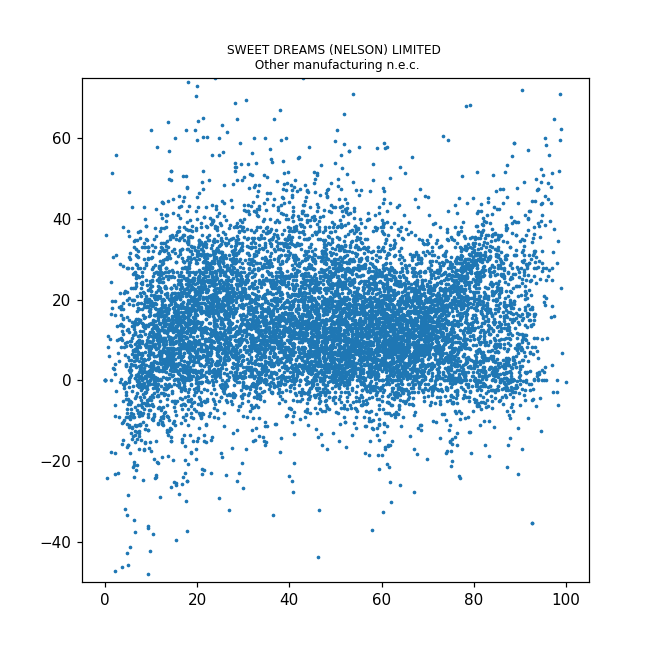

6

In [238]:
plt.figure(figsize=(6,6))
plt.scatter(df['total%female'], df['DiffMeanHourlyPercent'], marker='o', s=2, picker=10)
plt.ylim(-50, +75)

def onpick2(event):
    '''Listens for click near data point; finds & displays relevant info'''
    company = df.iloc[event.ind[0]]['EmployerName']
    industry = df.iloc[event.ind[0]]['Description']
    plt.gca().set_title('{} \n {}'.format(company, industry), size=8)

plt.gcf().canvas.mpl_connect('pick_event', onpick2)

In [227]:
df[['DiffMeanHourlyPercent', 'total%female']].corr()

,DiffMeanHourlyPercent,total%female
DiffMeanHourlyPercent,1.000000,0.043409
total%female,0.043409,1.000000


In [231]:
df[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']].corr()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent
DiffMeanHourlyPercent,1.000000,0.715307
DiffMedianHourlyPercent,0.715307,1.000000
